# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:


In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data
Estão rolando uns problemas aqui. Leia o comentário no código abaixo

In [4]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

* Now when you call ***fetch_housing_data()

It creates a datasets/housing directory in
your workspace, downloads the housing.tgz file, and extracts the housing.csv from it in
this directory.

# a Quick Look at the Data Structure (to get to know it)

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


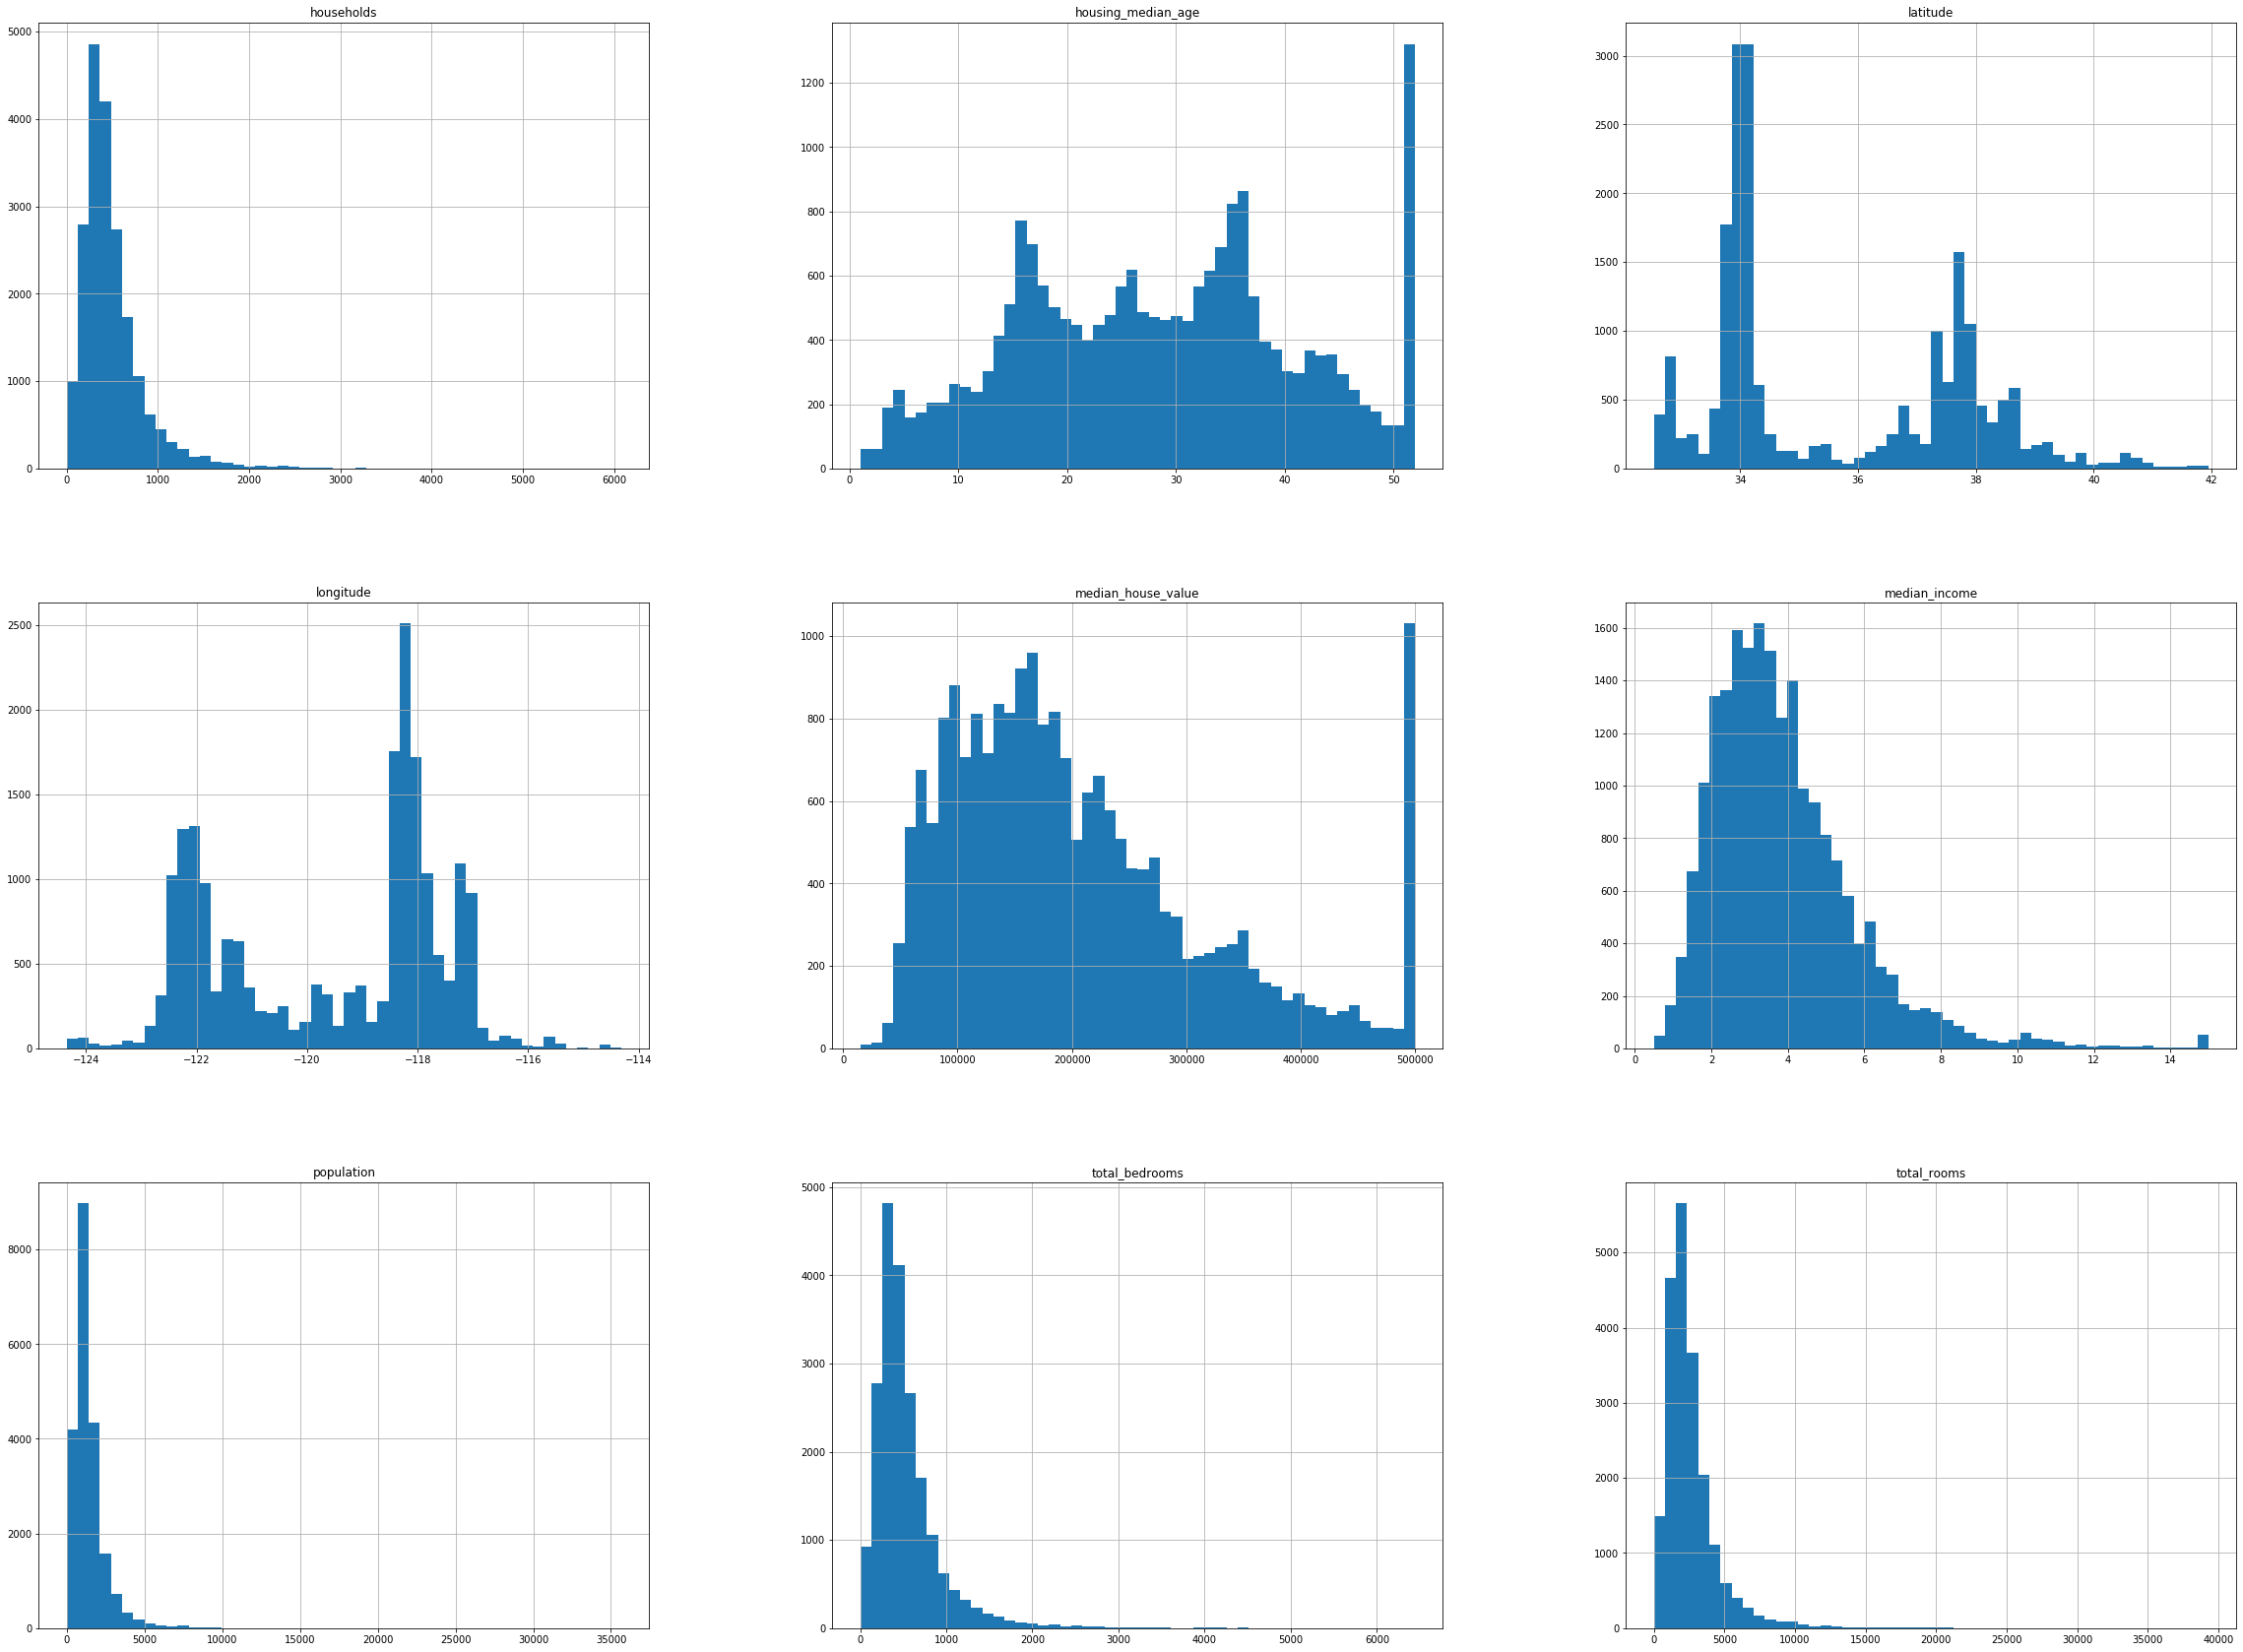

In [11]:
%matplotlib inline # only in a Jupyter notebook (it uses jupyter graphical backend)

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(40,30))
plt.show()

# Create a test set (and never look at it)

*estuda essa parte de fazer o teste e o treino, importante saporra e aí já tem uma sugestão de como fazer

### jeito 1 de fazer

In [14]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
# You can then use this function like this, but you can test with other values too:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


IMPORTANT: This works, but it is not perfect: if you run the program again, it will generate a
different test set! Over time, your Machine Learning algorithmsq will get to
see the whole dataset, which is what you want to avoid. livro p.49

### jeito 2 de fazer

Essa é a forma mais completa de se fazer um grupo de teste e treino, indexando os grupos e fazendo com que novas instâncias entrem no final do grupo e indexadas, caso a gente troque o dataset incial por um mais atualizado. livro p.50

In [ ]:
#para incluir o identificador no dataset

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
#como usar o identificador incluído no dataset

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
#outra forma é não usar o identificador, mas dados únicos das instâncias, como lat e long, neste caso

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

### jeito 3 de fazer 

Aqui foi usada aquela parada de usar uma seed fixa, no caso, 42, para quando abrir o programa de novo, seja gerado o **mesmo** grupo aleatório.
Isso é possível porque ao invés de usar o *split_train_test*, como antes, foi usado o *train_test_split*, que tem umas paradinhas a mais, como definir o seed de random e também usar mais de um dataset, desde que tenha as mesmas colunas. livro p.50

In [1]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

NameError: name 'housing' is not defined

### jeito 4 de fazer 

Os outros 3 métodos de se separar grupo de teste e treino são aleatórios, mas pode ser que precisemos retirar amostras, como por exemplo, num universo que tivermos estratificações, como 10% pobre, 80% classe média e 10% ricos. Para isso se usa a forma a seguir (ver livro p.51)

In [9]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Discover and Visualize the Data to Gain Insights

#### O objetivo aqui é visualizar os dados de forma mais aprofundada, em forma de gráfico, para se ter uma ideia geral de como eles se relacionam. Para isso, deve-se apresentar os dados em forma de gráfico. Caso tenhamos um volume de dados muito grande, é melhor criar um grupo menos com uma amostra representativa, para demorar menos para gerar as visualizações. Como os dados desse exemplo não são grandes, dá para usar tudo.

Primeiro deixamos o conjunto de teste de lado e usamos o conjunto de treino.

In [10]:
housing = strat_train_set.copy()

Depois usamos a latitute e longitute para gerar um gráfico com cara de localização para visualizarmos espacialmente os dados. Daí vai depender do conjunto de dados que temos (e de experiência) para planejar qual a melhor visualização.

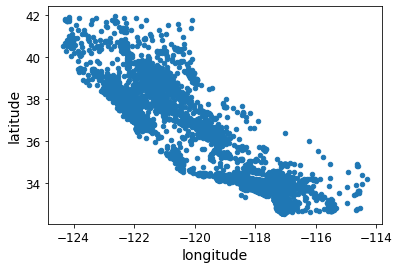

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")

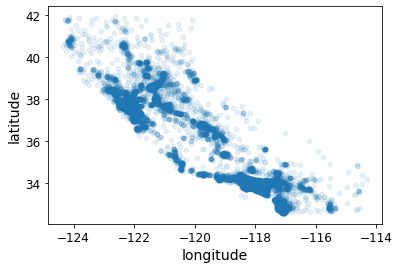

In [12]:
#Setting the alpha to 0.1 makes it easier to visualize the places where there is a high density of data points

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

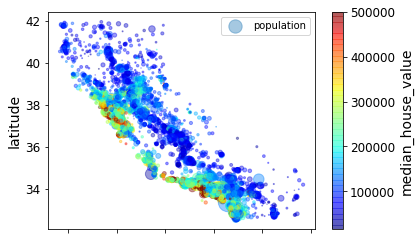

In [17]:
# Now let’s look at the housing prices. The radius of each circle represents
# the district’s population (option s), and the color represents the price (option c). We
# will use a predefined color map (option cmap) called jet , which ranges from blue
# (low values) to red (high prices)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. 
The ocean proximity attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule.

# precisa subir isso para o github para poder acessar a partir do tablet 